<a href="https://colab.research.google.com/github/rachanakafle/Assignment_Management_System/blob/master/Item_based_collaborative_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries



In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Load

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
!ls /content/drive/MyDrive/movie_dataset/u.data

/content/drive/MyDrive/movie_dataset/u.data


In [29]:
columns = ['user_id', 'item_id', 'rating', 'timestamp']
movie_data = pd.read_csv('/content/drive/MyDrive/movie_dataset/u.data', sep='\t', names=columns)

In [30]:
movie_data.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [31]:
movie_data.shape

(100000, 4)

In [32]:

movie_titles = pd.read_csv('/content/drive/MyDrive/movie_dataset/Movie_Titles.csv',encoding= 'unicode_escape')
movie_titles


,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [33]:
# combine movie_data and movie_titles
df = pd.merge(movie_data, movie_titles, on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


#### user_id - ID of the user who rated the movie.
#### item_id - ID of the movie.
#### rating - rating the user gave the movie, between 1 and 5.
#### timestamp - time the movie was rated.
#### title - title of the movie

## Data cleaning

In [34]:
# count the number of missing element(NAN) in each column
nan_count= df.isna().sum()
print(nan_count)

user_id      0
item_id      0
rating       0
timestamp    0
title        0
dtype: int64


In [35]:
# calculate duplicates
dups = df.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(df[dups])

False
Empty DataFrame
Columns: [user_id, item_id, rating, timestamp, title]
Index: []


# Data Analysis

In [36]:
df.shape

(100000, 5)

In [37]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [38]:
df.tail()

,user_id,item_id,rating,timestamp,title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


In [39]:
#Statitical features of the movie
df.describe()

,user_id,item_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


## Mean Rating

In [40]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean().round(2))
ratings.head()

,rating
title,
'Til There Was You (1997),2.33
1-900 (1994),2.60
101 Dalmatians (1996),2.91
12 Angry Men (1957),4.34
187 (1997),3.02


## Number of movie ratings

In [41]:
ratings['number_of_ratings'] = df.groupby('title')['rating'].count()
ratings.head()

,rating,number_of_ratings
title,,
'Til There Was You (1997),2.33,9
1-900 (1994),2.60,5
101 Dalmatians (1996),2.91,109
12 Angry Men (1957),4.34,125
187 (1997),3.02,41


## Plot between the rating and number_of_ratings

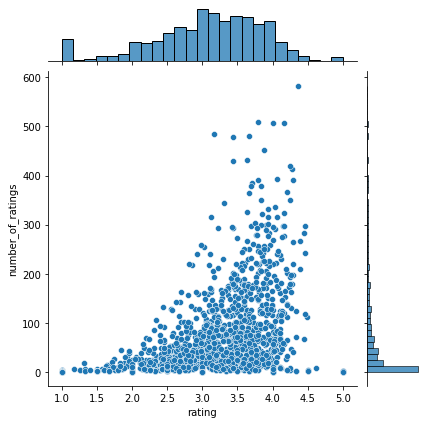

In [42]:
sns.jointplot(x='rating', y='number_of_ratings', data=ratings)


## Creating User - Item interaction matrix

In [43]:
movie_matrix_UII = df.pivot_table(index='user_id', columns='title', values='rating',fill_value=0)
movie_matrix_UII.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",8 1/2 (1963),8 Heads in a Duffel Bag (1997),8 Seconds (1994),? kldum klaka (Cold Fever) (1994),A Chef in Love (1996),Above the Rim (1994),Absolute Power (1997),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),Addams Family Values (1993),Addicted to Love (1997),"Addiction, The (1995)","Adventures of Pinocchio, The (1996)","Adventures of Priscilla, Queen of the Desert, The (1994)","Adventures of Robin Hood, The (1938)","Affair to Remember, An (1957)","African Queen, The (1951)",Afterglow (1997),"Age of Innocence, The (1993)",Aiqing wansui (1994),Air Bud (1997),Air Force One (1997),"Air Up There, The (1994)",Airheads (1994),Akira (1988),Aladdin (1992),Aladdin and the King of Thieves (1996),Alaska (1996),...,White Squall (1996),"Whole Wide World, The (1996)",Widows' Peak (1994),"Wife, The (1995)",Wild America (1997),Wild Bill (1995),"Wild Bunch, The (1969)",Wild Reeds (1994),Wild Things (1998),William Shakespeare's Romeo and Juliet (1996),Willy Wonka and the Chocolate Factory (1971),Window to Paris (1994),Wings of Courage (1995),Wings of Desire (1987),"Wings of the Dove, The (1997)",Winnie the Pooh and the Blustery Day (1968),"Winter Guest, The (1997)",Wishmaster (1997),With Honors (1994),Withnail and I (1987),Witness (1985),"Wizard of Oz, The (1939)",Wolf (1994),"Woman in Question, The (1950)","Women, The (1939)","Wonderful, Horrible Life of Leni Riefenstahl, The (1993)",Wonderland (1997),"Wooden Man's Bride, The (Wu Kui) (1994)","World of Apu, The (Apur Sansar) (1959)","Wrong Trousers, The (1993)",Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,2,5,0,0,3,4,0,0,0,0,0,0,0,0,0,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4,4,0,0,...,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,5,0,0,0,0,5,3,0,0,0,4
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,2,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,5,0,0,0,0,3,0,0,0,0,0,0,4,4,0,...,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,4,0,0,0,0,4


## Most rated movies

In [44]:
ratings.sort_values('number_of_ratings', ascending=False).head()

,rating,number_of_ratings
title,,
Star Wars (1977),4.36,583
Contact (1997),3.80,509
Fargo (1996),4.16,508
Return of the Jedi (1983),4.01,507
Liar Liar (1997),3.16,485


## Making recommendation for Star Wars(1977) movie





In [45]:
#Fetching ratings for Star Wars
star_wars_user_rating = movie_matrix_UII['Star Wars (1977)']


In [46]:
#Finding the correlation with different movies
similar_to_Star_Wars=movie_matrix_UII.corrwith(star_wars_user_rating )

In [47]:
#Observing the result
similar_to_Star_Wars.head()

title
'Til There Was You (1997)   -0.008917
1-900 (1994)                -0.009002
101 Dalmatians (1996)        0.155780
12 Angry Men (1957)          0.213142
187 (1997)                  -0.034590
dtype: float64

## creating a threshold for minimum number of ratings

In [48]:
#creating dataframe to bring in #of ratings
corr_Star_Wars = pd.DataFrame(similar_to_Star_Wars, columns=['Correlation'])
corr_Star_Wars.dropna(inplace=True)
corr_Star_Wars.head()

,Correlation
title,
'Til There Was You (1997),-0.008917
1-900 (1994),-0.009002
101 Dalmatians (1996),0.155780
12 Angry Men (1957),0.213142
187 (1997),-0.034590


In [49]:
#Bringining in ratings
corr_Star_Wars = corr_Star_Wars.join(ratings['number_of_ratings'])

corr_Star_Wars.head()

,Correlation,number_of_ratings
title,,
'Til There Was You (1997),-0.008917,9
1-900 (1994),-0.009002,5
101 Dalmatians (1996),0.155780,109
12 Angry Men (1957),0.213142,125
187 (1997),-0.034590,41


In [50]:
corr_Star_Wars[corr_Star_Wars['number_of_ratings'] > 30].sort_values(by='Correlation', ascending=False).head(6)

,Correlation,number_of_ratings
title,,
Star Wars (1977),1.000000,583
Return of the Jedi (1983),0.748753,507
"Empire Strikes Back, The (1980)",0.554549,367
Raiders of the Lost Ark (1981),0.541920,420
Indiana Jones and the Last Crusade (1989),0.468690,331
Toy Story (1995),0.457677,452
